<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana6/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Oscar Villa Cardenas A01794052
*   Héctor Raúl Vázquez González A00565542
*   Alejandro Munguia Salazar A01104775
*   Jorge Mariles Estrada A01335663
*   Freddy Armendariz Herrera A01793672


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests, zipfile
from io import BytesIO

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns

from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn.datasets import load_iris

#**Ejercicio-1.** 

In [2]:
# importing necessary modules
print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/SouthGermanCredit')

In [63]:
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [4]:
X = df.iloc[:,:-1]  
Y = df.iloc[:,-1]     # También puede ser: data[['credit_risk']]

In [5]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)
print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

In [6]:
# Transformaciones a factores numéricos de entrada:
#Se aplica la imputacion con la mediana por ser variables numericas
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))
                                 #Transformacion de logaritmo centra mas los datos
                                 #,('sqrt', FunctionTransformer(np.log))
                                 ])
   
num_pipeline_nombres = ['duration','amount','employment_duration',
                        'installment_rate','present_residence','age',
                        'number_credits','people_liable']

# Transformaciones a factores categóricos y binarios de entrada:

#One hot encoding aplicado a las variables binarias toma en consideracion que
#podemos usar una dimension menos y aun asi representar toda la informacion: Si
#la observacion es 0 en todas las variables binarias, Entonces debe de ser 1 en
#la variable final binaria
#catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline = Pipeline(steps = [
    ('impMostFrequent', SimpleImputer(strategy='most_frequent')),
    ('OneHotE', OneHotEncoder(handle_unknown="ignore"))
])
catOHE_pipeline_nombres = [ 'status','credit_history','purpose','savings',
                           'personal_status_sex','other_debtors',
                           'other_installment_plans','housing',
                           'telephone']


In [7]:
# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

Test: 

LR:
mean Accuracy: 0.769 (0.0321)
mean Precision: 0.806 (0.0227)
mean Recall: 0.883 (0.0318)
mean F1score: 0.842 (0.0225)
Gmean: 0.665 (0.0475)

Train: 

LR:
mean Accuracy: 0.796 (0.0089)
mean Precision: 0.820 (0.0074)
mean Recall: 0.908 (0.0062)
mean F1score: 0.862 (0.0058)
Gmean: 0.697 (0.0150)

Test: 

DT:
mean Accuracy: 0.714 (0.0295)
mean Precision: 0.798 (0.0208)
mean Recall: 0.793 (0.0379)
mean F1score: 0.795 (0.0238)
Gmean: 0.646 (0.0390)

Train: 

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Test: 

RF:
mean Accuracy: 0.772 (0.0216)
mean Precision: 0.787 (0.0185)
mean Recall: 0.925 (0.0180)
mean F1score: 0.850 (0.0137)
Gmean: 0.618 (0.0457)

Train: 

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



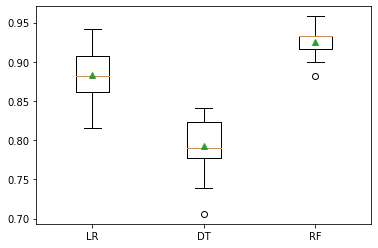

In [8]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1))
  nombres.append('LR')

  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres

def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):

     tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
     recall = tp / (tp + fn)
     especifidad = tn / (tn + fp)

     gmean = np.sqrt(recall * especifidad)

     return gmean

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
   
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  # Ejercicio 5.2:
  resultadosOU = cross_validate(pipeline, Xtv, ytv, scoring=mismetricas, cv=kfold, return_train_score=True)

  # Ejercicio 5.3:
  # agregando resultados a la lista:
  resultados.append(resultadosOU)
  print("Test: \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean'])
                                                                          ))
  print("Train: \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']), 
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']),
                                                                          np.std(resultadosOU['train_f1score']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean'])
                                                                          ))
  
data = list()
for resultado in resultados:
  rr = resultado['test_recall']
  data.append(rr)

plt.boxplot(data, labels=nombres, showmeans=True)
plt.show()

# ¿Alguno de los modelos está subentrenado o sobreentrenado?
Yo diria que los tres modelos estan sobreentrenados porque obtienen una mejor calificacionen en el train que en el test

In [9]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def plotValidationCurve(param_range, train_scores, val_scores):
   train_mean = np.mean(train_scores, axis=1)
   train_std = np.std(train_scores, axis=1)

   test_mean = np.mean(val_scores, axis=1)
   test_std = np.std(val_scores, axis=1)

   plt.subplots(1, figsize=(7,7))
   plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
   plt.plot(param_range, test_mean,color='red', marker='+', markersize=5, linestyle='--', label='Validation')

   plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
   plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
 
   plt.title("Curvas de Aprendizaje incrementando el tamaño de la muestra")
   plt.xlabel("Tamaño del conjunto de entrenamiento")
   plt.ylabel("Exactitud (accuracy)")
   plt.tight_layout()
   plt.legend(loc="lower left")
   plt.show()

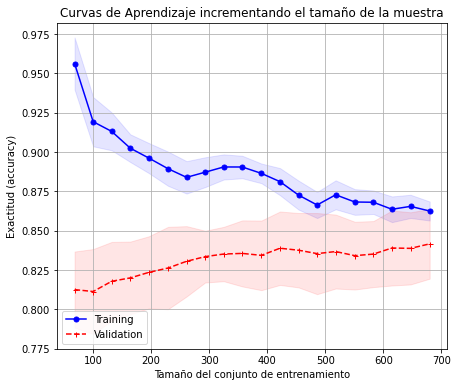

In [10]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])
delta_train_sz = np.linspace(0.1, 1, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = Xtv,
  y = ytv,
  cv = kfold ,
  scoring=make_scorer(mi_f1score),
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

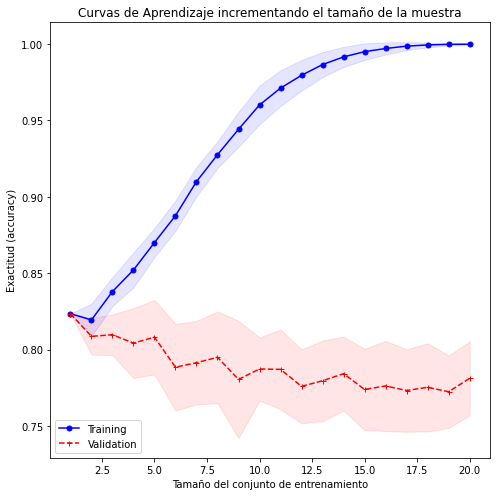

In [11]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
param_range = np.linspace(1,20,20, dtype="int")
t_scores, v_scores = validation_curve(
    estimator= pipeline,
    X = Xtv,
    y = ytv,
    param_name = "m__max_depth",
    param_range = param_range,
    cv = kfold,
    scoring = make_scorer(mi_f1score),
)
plotValidationCurve(param_range, t_scores, v_scores)

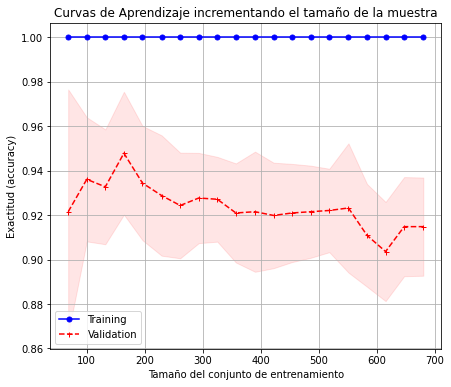

In [12]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = Xtv,
  y = ytv,
  cv = kfold ,
  scoring='recall',
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-5.**

Mejor valor de exactitud obtenido con la mejor combinación: 0.8467052315243243
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Métrica utilizada: f1


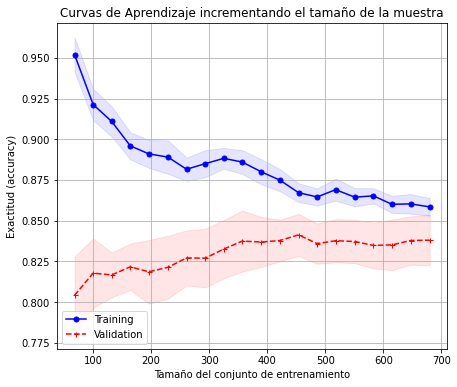

In [13]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])

param_grid = {
    'C':[0.0001,0.01,0.1,1.0,10.,100.],
    'solver':['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(estimator=modelos[0],
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='f1')

Xx = columnasTransformer.fit_transform(Xtv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

modelo = LogisticRegression(max_iter=10000, random_state=1, C=1.0, class_weight=None, penalty='l2', solver='liblinear')
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = Xtv,
  y = ytv,
  cv = kfold ,
  scoring='f1',
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

# ¿Cuál es la utilidad de la métrica “f1-score”?
F1-score is used when the False Negatives and False Positives are crucial.
El F1 score es utilizado cuando los falsos negativos y los falsos positivos son cruciales

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4320 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fail

Mejor valor de exactitud obtenido con la mejor combinación: 0.880858340390717
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1.0, 'min_samples_split': 0.0001}
Métrica utilizada: precision


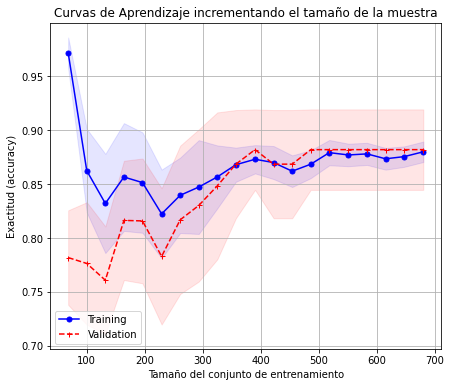

In [14]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])

param_grid = {
    'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [0.0001,0.01,0.1,1.0,10.,100.],
    'min_samples_split': [0.0001,0.01,0.1,1.0],
    'class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=modelos[1],
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='precision')

Xx = columnasTransformer.fit_transform(Xtv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

modelo = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', criterion='gini', max_depth=1.0, min_samples_split=0.0001)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = Xtv,
  y = ytv,
  cv = kfold ,
  scoring='precision',
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

# ¿Cuál es la utilidad de la métrica “precision”?
La precision es una buena metrica de evaluacion para usar cuando el costo de un falso positivo es muy alto y el costo de un falso negativo es bajo.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4320 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobl

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 0.0001, 'min_samples_split': 0.0001}
Métrica utilizada: recall


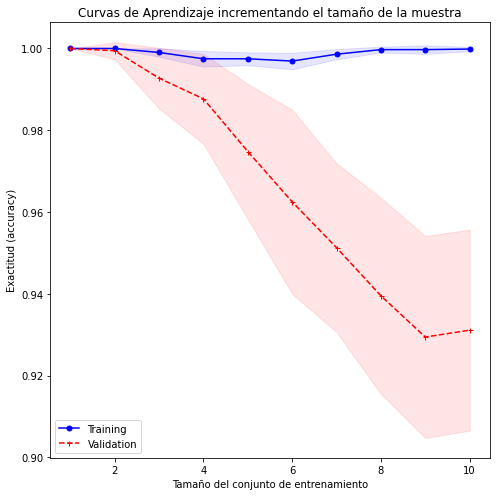

In [15]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])

param_grid = {
    'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [0.0001,0.01,0.1,1.0,10.,100.],
    'min_samples_split': [0.0001,0.01,0.1,1.0],
    'class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=modelos[2],
                    param_grid=param_grid,
                    cv=kfold,
                    scoring='recall')

Xx = columnasTransformer.fit_transform(Xtv)

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

modelo = RandomForestClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini', max_depth=0.0001, min_samples_split=0.0001)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
param_range = np.linspace(1,10,10, dtype="int")
t_scores, v_scores = validation_curve(
    estimator= pipeline,
    X = Xtv,
    y = ytv,
    param_name = "m__max_depth",
    param_range = param_range,
    cv = kfold,
    scoring = 'recall'
)
plotValidationCurve(param_range, t_scores, v_scores)

# ¿Cuál es la utilidad de la métrica “recall”?
Recall calcula el porcentage de los verdaderos positivos que un modelo identifico correctamente, Cuando el costo de un falso negativo es alto se recomienda usar recall.

#**Ejercicio-6.**

In [16]:
def printConsufionMatrix(cm):
  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

Score: 0.7466666666666667


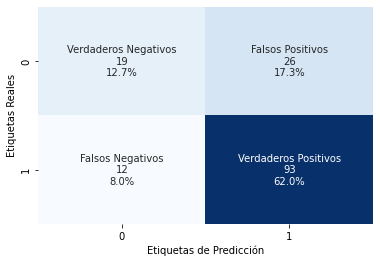

In [18]:
modelo = LogisticRegression(max_iter=10000, random_state=1, C=1.0, class_weight=None, penalty='l2', solver='liblinear')
# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
score = modelo.score(Xxtest, np.ravel(ytest))
print("Score: "+str(score))

pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
printConsufionMatrix(cm)

Score: 0.5866666666666667


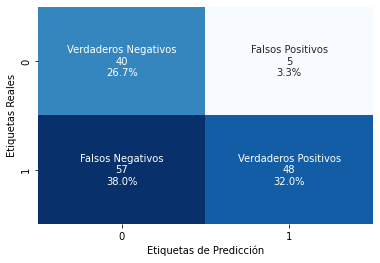

[Text(0.5, 0.75, 'property <= 0.5\ngini = 0.5\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.25, 'gini = 0.467\nsamples = 509\nvalue = [356.667, 210.714]'),
 Text(0.75, 0.25, 'gini = 0.367\nsamples = 341\nvalue = [68.333, 214.286]')]

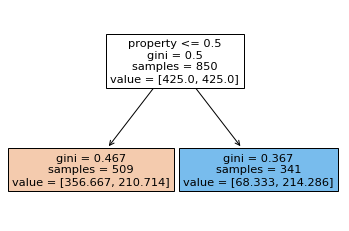

In [73]:
modelo = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', criterion='gini', max_depth=1.0, min_samples_split=0.0001)
# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
score = modelo.score(Xxtest, np.ravel(ytest))
print("Score: "+str(score))

pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
printConsufionMatrix(cm)

tree.plot_tree(filled = True, decision_tree = modelo, feature_names=Xtv.columns)

Score: 0.7


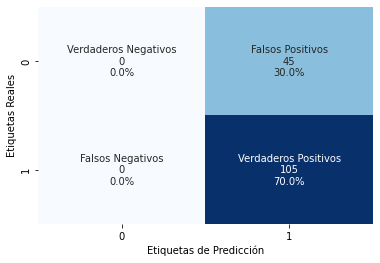

In [20]:
modelo = RandomForestClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini', max_depth=0.0001, min_samples_split=0.0001)
# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
score = modelo.score(Xxtest, np.ravel(ytest))
print("Score: "+str(score))

pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
printConsufionMatrix(cm)

###**Fin de la Actividad de la semana 6.**